In [1]:
def loadAndFormatData(filename):
    data = pd.read_csv(filename, sep=", ", header=None)
    data.columns = ["x1", "x2", "x3", "x4","x5","x6","x7","x8","x9","x10","x11","x12","x13","x14","x15","x16"]
    data.drop(["x3", "x7", "x8", "x9", "x10", "x11", "x12", "x13", "x14", "x15", "x16"], axis=1, inplace=True)
    print(data.shape)
    return data


import pandas as pd
import numpy as np

# dataLeftMost = loadAndFormatData('sonarLogLeftMost.txt')
# print(dataLeftMost.info())

dataLeft = loadAndFormatData('sonarLogL.txt')
# print(dataLeft.head())
# dataRightMost = loadAndFormatData('sonarLogRightMost.txt')
dataRight = loadAndFormatData('sonarLogR.txt')
dataMid = loadAndFormatData('sonarLogM.txt')


C:\ProgramData\Miniconda2\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


(2460, 5)
(2450, 5)
(2560, 5)


In [4]:
# frequency ~~ 50Hz
# dataLeftMost.info()

def removeOutliers(dataFrame):
    print("before removal: ", dataFrame.shape)
    d_mean = dataFrame.mean()
    d_std = dataFrame.std()
    # dataFrame.describe()
    outlier_index = []
    for column in dataFrame:
    #     print(dataFrame[column])
        for ind, val in enumerate(dataFrame[column]):
    #         print(i, j)
            if val > (d_mean[column] + 3*d_std[column]) or val < (d_mean[column] - 3*d_std[column]):
                outlier_index.append(ind)

    outlier_index = list(set(outlier_index))
#     print(outlier_index, len(outlier_index))
    result = dataFrame.drop(dataFrame.index[outlier_index])
    result.reset_index(drop=True, inplace=True)
    print("after removal: ", result.shape)
    return result


dataLeft = removeOutliers(f_dataLeft)
dataRight = removeOutliers(f_dataRight)
dataMid = removeOutliers(f_dataMid)

('before removal: ', (2460, 10))
('after removal: ', (2446, 10))
('before removal: ', (2450, 10))
('after removal: ', (2311, 10))
('before removal: ', (2560, 10))
('after removal: ', (2553, 10))


In [5]:
def movingAvg(dataSet, winSize=5):
#     print(dataSet.head(20))    
    ma_data = dataSet.copy()
    for ind, col in enumerate(dataSet):
        ma_data[col] = dataSet[col].rolling(window=winSize).mean()

#     print(ma_data.head(20), ma_data.shape)
    ma_data.dropna(inplace=True)
    ma_data.reset_index(drop=True, inplace=True)
    print(ma_data.head(10), ma_data.shape)    
    return ma_data


# col_names =  ['MA1', 'MA2', 'MA3', 'MA4', 'MA5', 'MA6']
# dataLeftMostMA = movingAvg(dataLeftMost,  winSize = 5)
dataLeftMA = movingAvg(dataLeft, winSize = 5)
# dataRightMostMA = movingAvg(dataRightMost, winSize = 5)
dataRightMA = movingAvg(dataRight, winSize = 5)
dataMidMA = movingAvg(dataMid, winSize = 5)



(      x0         x1     x2         x3         x4        x5         x6  \
0  0.207   3.947000  1.743   2.938000   3.740000  1.536000   2.731000   
1  0.308   5.917000  2.559   4.577000   5.608999  2.251000   4.269000   
2  0.409   7.886999  3.375   6.216000   7.477999  2.966000   5.807000   
3  0.510   9.856999  4.191   7.855000   9.346999  3.681000   7.345000   
4  0.611  11.826999  5.007   9.493999  11.215999  4.396000   8.882999   
5  0.712  13.796998  5.823  11.132999  13.084999  5.111001  10.420999   
6  0.610  12.065398  4.998   9.474999  11.455399  4.388001   8.864999   
7  0.508  10.333798  4.173   7.816999   9.825799  3.665000   7.309000   
8  0.406   8.602199  3.348   6.158999   8.196199  2.942000   5.753000   
9  0.304   6.870599  2.523   4.501000   6.566599  2.219000   4.197000   

         x7        x8        x9  
0 -2.203999 -1.009000  1.195000  
1 -3.357999 -1.340000  2.018000  
2 -4.511999 -1.671000  2.840999  
3 -5.665999 -2.002000  3.663999  
4 -6.819998 -2.332999  4.

In [2]:
def featureExtaction(df):
    result, header = [], []
    for ind in range(sum(range(df.shape[1]))):
        header.append("x{}".format(ind))
    
    for i in range(df.shape[0]):
        temp = []
        for j in range(len(df.iloc[i])-1):
            for k in range(j+1, len(df.iloc[i])):
                temp.append(df.iloc[i, j] - df.iloc[i, k])
        result.append(temp)    
    
#     print(len(result), len(temp), len(header), len(df.iloc[i]))
    return pd.DataFrame(result, columns=header)


f_dataLeft = featureExtaction(dataLeftMA)
f_dataRight = featureExtaction(dataRightMA)
f_dataMid = featureExtaction(dataMidMA)


In [3]:
f_dataLeft.info()
f_dataLeft.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 10 columns):
x0    2460 non-null float64
x1    2460 non-null float64
x2    2460 non-null float64
x3    2460 non-null float64
x4    2460 non-null float64
x5    2460 non-null float64
x6    2460 non-null float64
x7    2460 non-null float64
x8    2460 non-null float64
x9    2460 non-null float64
dtypes: float64(10)
memory usage: 192.3 KB


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,0.609611,9.039141,3.377028,8.349021,8.429530,2.767417,7.739410,-5.662113,-0.690120,4.971993
std,0.328051,5.673729,2.514939,4.742141,5.386656,2.279713,4.455319,3.460474,1.178764,2.618517
min,-0.008000,-0.555000,-1.711000,-0.888000,-0.886000,-2.117000,-1.292000,-13.232996,-5.573995,-1.883000
25%,0.362500,3.949000,1.458000,4.499000,3.739000,0.894750,4.031750,-8.559997,-1.446997,2.994000
50%,0.610000,9.297998,3.228500,7.787000,8.670999,2.809000,7.373000,-5.611999,-0.763998,4.901000
75%,0.868000,13.799498,5.537250,12.694000,13.083997,4.468251,11.723001,-2.785499,0.224000,7.116000
max,1.323999,19.714995,8.339000,16.505000,18.799996,7.424001,15.595001,1.479000,1.779000,10.338000


In [6]:
def labelAndCombineData(df_list):
    data_list = []
    label_list = []
    for ind, df in enumerate(df_list):
        temp = df.copy()
        label = pd.Series(ind, index=df.index, dtype=int)
        data_list.append(temp)
        label_list.append(label)
    
    return pd.concat(data_list, axis=0), pd.concat(label_list, axis=0)

# com_data, com_label = labelAndCombineData([pd.concat([dataLeftMostMA, dataLeftMA], axis=0), pd.concat([dataRightMostMA, dataRightMA], axis=0), dataMid])
com_data, com_label = labelAndCombineData([f_dataLeft, f_dataRight, f_dataMid])

# print(com_data, com_label)

 

In [7]:
# feature normalization
def normalizeTrainDF(dataFrame, mode="std"):
    result = dataFrame.copy()    
    params = pd.DataFrame(index=range(len(dataFrame.columns)),columns = ["std", "mean", "min", "max"])
    
    for ind, feature_name in enumerate(dataFrame.columns):
        std_value = dataFrame[feature_name].std()
        mean_value = dataFrame[feature_name].mean()
        max_value = dataFrame[feature_name].max()
        min_value = dataFrame[feature_name].min()
        params.iloc[ind] = [std_value, mean_value, max_value, min_value]        
        if mode == "std":
            result[feature_name] = ((dataFrame[feature_name] - mean_value) / std_value) if std_value else 0
        elif mode == "mean":
            result[feature_name] = ((dataFrame[feature_name] - mean_value) / (max_value - mean_value)) if (max_value - mean_value) else 0
        else:
            result[feature_name] = ((dataFrame[feature_name] - min_value) / (max_value - min_value)) if (max_value - min_value) else 0

    return result, params
        
norm_data, params = normalizeTrainDF(com_data)
print(norm_data.head(), params["std"][0])


def normalizeTestDF(dataFrame, params, mode="std"):
    result = dataFrame.copy()    
    
    for ind, feature_name in enumerate(dataFrame.columns):  
        print(ind, feature_name, dataFrame[feature_name].dtype,  params["mean"][ind].dtype)
        if mode == "std":
            result[feature_name] = ((dataFrame[feature_name] - params["mean"][ind]) / params["std"][ind]) if params["std"][ind] else 0
        elif mode == "mean":
            result[feature_name] = ((dataFrame[feature_name] - params["mean"][ind]) / (params["max"][ind] - params["mean"][ind])) if (params["max"][ind] - params["mean"][ind]) else 0
        else:
            result[feature_name] = ((dataFrame[feature_name] - params["min"][ind]) / (params["max"][ind] - params["min"][ind])) if (params["max"][ind] - params["min"][ind]) else 0

    return result
    


(         x0        x1        x2        x3        x4        x5        x6  \
0 -0.949235 -0.577606 -0.832921 -0.264654 -0.551152 -0.780998 -0.204947   
1 -0.563752 -0.206425 -0.668490  0.190725 -0.185461 -0.637252  0.242899   
2 -0.178270  0.164756 -0.504058  0.646104  0.180230 -0.493505  0.690745   
3  0.207212  0.535936 -0.339627  1.101482  0.545921 -0.349759  1.138592   
4  0.592693  0.907117 -0.175196  1.556861  0.911611 -0.206012  1.586438   

         x7        x8        x9  
0 -0.124610  0.448590  0.482112  
1 -0.259274  0.378320  0.606850  
2 -0.393939  0.308050  0.731589  
3 -0.528603  0.237779  0.856327  
4 -0.663267  0.167509  0.981065  , 0.26200948313400058)


In [8]:
# dimension reduction
from sklearn.decomposition import PCA 
pca=PCA(n_components=3, copy=True, whiten=False)
reduced_data = pca.fit_transform(norm_data)
print(pca.components_, pca.n_components_, pca.explained_variance_ratio_, pca.mean_, pca.noise_variance_)




(array([[-0.27400865, -0.37086289,  0.29096931, -0.26408221, -0.37107567,
         0.30473166, -0.25586435,  0.39818893,  0.21608099, -0.36291445],
       [ 0.32062615,  0.00935245,  0.34142147,  0.50038624, -0.00672488,
         0.3237448 ,  0.49996453,  0.19192426,  0.37180592,  0.01616686],
       [ 0.33781352,  0.3255631 ,  0.36953415, -0.14998307,  0.32076311,
         0.35088729, -0.18296184,  0.01236332, -0.48142607, -0.35976448]]), 3, array([ 0.57923625,  0.21942495,  0.18268571]), array([  0.00000000e+00,   3.11385477e-17,   1.55692739e-17,
        -1.24554191e-16,   0.00000000e+00,   2.02400560e-16,
        -6.22770954e-17,  -6.22770954e-17,  -6.22770954e-17,
         0.00000000e+00]), 0.026647281272507532)


<IPython.core.display.Javascript object>


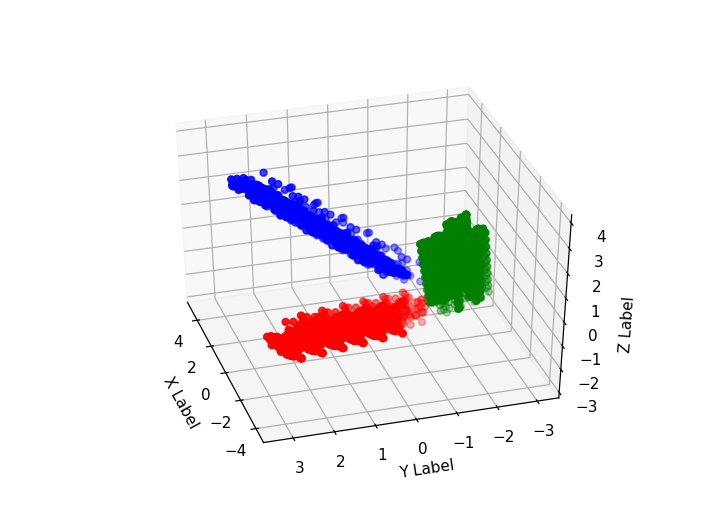

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
import ipympl
from mpl_toolkits.mplot3d import Axes3D




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_data[com_label==0, 0], reduced_data[com_label==0, 1], reduced_data[com_label==0, 2:], c='r', marker='o')
ax.scatter(reduced_data[com_label==1, 0], reduced_data[com_label==1, 1], reduced_data[com_label==1, 2:], c='b', marker='o')
ax.scatter(reduced_data[com_label==2, 0], reduced_data[com_label==2, 1], reduced_data[com_label==2, 2:], c='g', marker='o')
# ax.scatter(reduced_data[com_label==3, 0], reduced_data[com_label==3, 1], reduced_data[com_label==3, 2:], c='c', marker='o')
# ax.scatter(reduced_data[com_label==4, 0], reduced_data[com_label==4, 1], reduced_data[com_label==4, 2:], c='m', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [10]:
from sklearn import linear_model
from sklearn import metrics, cross_validation

logreg = linear_model.LogisticRegression(C=1e-1)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(norm_data, com_label)


predicted = cross_validation.cross_val_predict(logreg, norm_data, com_label, cv=10)
print metrics.accuracy_score(com_label, predicted)
print metrics.classification_report(com_label, predicted) 


C:\ProgramData\Miniconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.998356614626
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2442
          1       1.00      1.00      1.00      2307
          2       1.00      1.00      1.00      2553

avg / total       1.00      1.00      1.00      7302



In [11]:
def makePredction():
    data = loadAndFormatData('sonarLog.txt')    
    dataMA = movingAvg(data,  winSize = 5)
    dataNorm = normalizeTestDF(dataMA, params)
    with open("prediction.txt", "a") as myfile:
        for i in range(dataNorm.shape[0]):
            current = dataNorm.iloc[i].values.reshape(1, -1)
#             print(current, str(logreg.predict(current)[0]))
            myfile.write(str(logreg.predict(current)[0]))
    
# makePredction()

In [12]:
def segmentData(df, winSize=5): # offset ???
    temp_list = []
    col_names = []
    for i in range(len(df.columns)*winSize):
        col_names.append("x{}".format(i))
        
    for i in range(0, df.shape[0]-winSize, winSize):
        temp = pd.DataFrame(df.iloc[i:i+winSize, :].values.reshape(1, len(df.columns)*winSize), range(1), columns=col_names)
        
        temp_list.append(temp)
    
    
    result = pd.concat(temp_list, axis=0)
    result = result.reset_index(drop=True)
    print(result.head())
    return result
    
# segLM_MA = segmentData(dataLeftMostMA)
segL_MA = segmentData(dataLeftMA)
# segRM_MA = segmentData(dataRightMostMA)
segR_MA = segmentData(dataRightMA)
segM_MA = segmentData(dataMidMA)



       x0         x1      x2         x3         x4        x5         x6  \
0  0.2070   3.947000  1.7430   2.938000   3.740000  1.536000   2.731000   
1  0.7120  13.796998  5.8230  11.132999  13.084999  5.111001  10.420999   
2  0.2020   5.139000  1.6980   2.843000   4.936999  1.496000   2.641000   
3  0.3854   8.346198  2.8832   6.457200   7.960799  2.497800   6.071800   
4  0.4080   8.231999  2.6210   7.781000   7.823999  2.213000   7.373000   

         x7        x8        x9    ...        x40        x41     x42  \
0 -2.203999 -1.009000  1.195000    ...     0.6110  11.826999  5.0070   
1 -7.973998 -2.663999  5.309999    ...     0.3040   6.870599  2.5230   
2 -3.440999 -2.295999  1.145000    ...     0.4452   9.697598  3.5146   
3 -5.462998 -1.888998  3.574000    ...     0.3070   6.262000  1.8050   
4 -5.610999 -0.450999  5.160000    ...     0.6098  12.102398  4.4040   

         x43        x44       x45        x46       x47       x48       x49  
0   9.493999  11.215999  4.396000   8.8

In [13]:
com_seg_data, com_seg_label = labelAndCombineData([segL_MA, segR_MA, segM_MA])
# print(com_seg_data, com_seg_label)

norm_seg_data, params = normalizeTrainDF(com_seg_data)
print(norm_seg_data.head())

pca=PCA(n_components=3, copy=True, whiten=False)
reduced_seg_data = pca.fit_transform(norm_seg_data)



NameError: name 'segLM_MA' is not defined

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_seg_data[com_seg_label==0, 0], reduced_seg_data[com_seg_label==0, 1], reduced_seg_data[com_seg_label==0, 2:], c='r', marker='o')
ax.scatter(reduced_seg_data[com_seg_label==1, 0], reduced_seg_data[com_seg_label==1, 1], reduced_seg_data[com_seg_label==1, 2:], c='b', marker='o')
ax.scatter(reduced_seg_data[com_seg_label==2, 0], reduced_seg_data[com_seg_label==2, 1], reduced_seg_data[com_seg_label==2, 2:], c='g', marker='o')
# ax.scatter(reduced_seg_data[com_seg_label==3, 0], reduced_seg_data[com_seg_label==3, 1], reduced_seg_data[com_seg_label==3, 2:], c='c', marker='o')
# ax.scatter(reduced_seg_data[com_seg_label==4, 0], reduced_seg_data[com_seg_label==4, 1], reduced_seg_data[com_seg_label==4, 2:], c='m', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
logreg = linear_model.LogisticRegression(C=10)

pca=PCA(n_components=5, copy=True, whiten=False)
reduced_seg_data = pca.fit_transform(norm_seg_data)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(reduced_seg_data, com_seg_label)


predicted = cross_validation.cross_val_predict(logreg, reduced_seg_data, com_seg_label, cv=10)
print metrics.accuracy_score(com_seg_label, predicted)
print metrics.classification_report(com_seg_label, predicted) 